In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer/breast-cancer.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/kaggle/input/cancer/breast-cancer.csv")

In [6]:
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [7]:
df.isnull().sum()

age             0
mefalsepause    0
tumor-size      0
inv-falsedes    0
falsede-caps    8
deg-malig       0
breast          0
breast-quad     1
irradiat        0
class           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

age             0
mefalsepause    0
tumor-size      0
inv-falsedes    0
falsede-caps    0
deg-malig       0
breast          0
breast-quad     0
irradiat        0
class           0
dtype: int64

In [10]:
df.duplicated().sum()

0

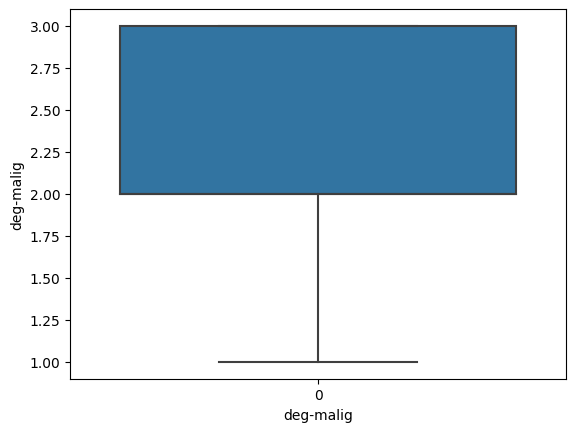

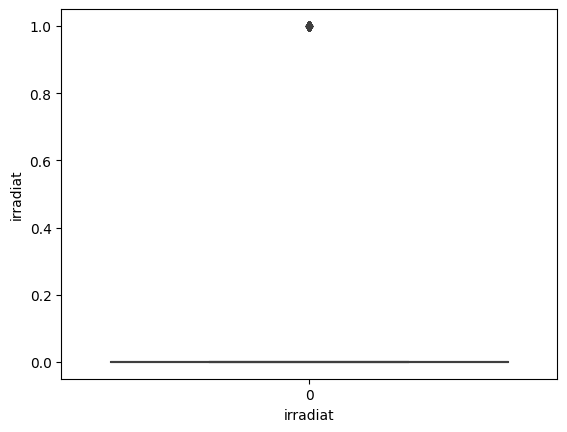

In [11]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel(col)
        plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [15]:
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,False,1
1,3,0,2,0,0,1,1,0,False,0
2,3,0,6,0,0,2,0,1,False,1
3,2,2,6,0,1,3,1,1,True,0
4,2,2,5,4,1,2,0,4,False,1
...,...,...,...,...,...,...,...,...,...,...
267,3,0,5,5,1,2,0,1,False,0
268,3,2,4,4,1,2,0,1,True,0
269,1,2,5,5,1,2,1,4,False,0
270,3,2,2,0,0,2,1,1,False,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from inspect import modulesbyfile

In [18]:
x=df.iloc[:,:-1]
y=df['class']

In [19]:
x

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,2,0,1,3,1,2,False
1,3,0,2,0,0,1,1,0,False
2,3,0,6,0,0,2,0,1,False
3,2,2,6,0,1,3,1,1,True
4,2,2,5,4,1,2,0,4,False
...,...,...,...,...,...,...,...,...,...
267,3,0,5,5,1,2,0,1,False
268,3,2,4,4,1,2,0,1,True
269,1,2,5,5,1,2,1,4,False
270,3,2,2,0,0,2,1,1,False


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
267    0
268    0
269    0
270    0
271    0
Name: class, Length: 263, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=70)

In [22]:
x_train

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat
238,3,0,5,6,1,3,0,3,True
11,4,0,2,0,0,2,1,2,False
178,2,2,9,0,0,1,0,1,True
54,3,0,6,2,0,3,0,1,False
71,3,0,1,0,0,1,0,1,False
...,...,...,...,...,...,...,...,...,...
268,3,2,4,4,1,2,0,1,True
123,2,2,2,0,0,2,0,2,False
63,4,0,2,0,0,2,0,1,False
120,3,0,5,0,0,1,1,1,False


In [23]:
y_train

238    1
11     0
178    0
54     0
71     0
      ..
268    0
123    1
63     0
120    0
221    0
Name: class, Length: 197, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model=DecisionTreeClassifier(random_state=58)

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=58)

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [32]:
y_test

99     0
12     0
41     1
249    0
225    1
      ..
154    0
59     0
23     1
241    0
261    0
Name: class, Length: 66, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_pred,y_test)*100

68.18181818181817

In [38]:
from sklearn.metrics import *

In [41]:
cf=confusion_matrix(y_pred,y_test)

<Axes: >

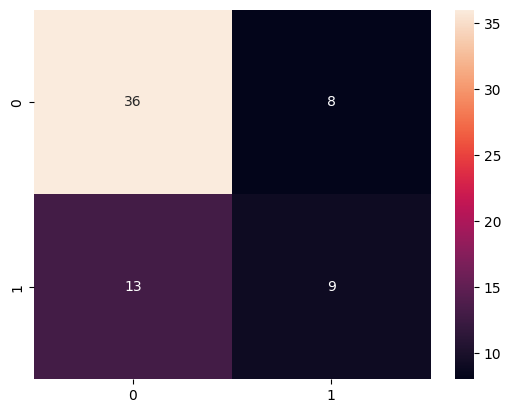

In [42]:
sns.heatmap(cf,annot=True)

In [43]:
depth=[1,2,3,4,5,6,7,8,9,10]

In [44]:
for max_d in depth:
    model=DecisionTreeClassifier(max_depth=max_d,random_state=58)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"The accuracy of the model for max depth {max_d} is {acc}")

The accuracy of the model for max depth 1 is 0.7121212121212122
The accuracy of the model for max depth 2 is 0.7878787878787878
The accuracy of the model for max depth 3 is 0.7575757575757576
The accuracy of the model for max depth 4 is 0.7424242424242424
The accuracy of the model for max depth 5 is 0.7121212121212122
The accuracy of the model for max depth 6 is 0.7272727272727273
The accuracy of the model for max depth 7 is 0.7424242424242424
The accuracy of the model for max depth 8 is 0.7272727272727273
The accuracy of the model for max depth 9 is 0.7272727272727273
The accuracy of the model for max depth 10 is 0.7121212121212122


In [47]:
final_model=DecisionTreeClassifier(max_depth=2,random_state=58)
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc*100

78.78787878787878

In [48]:
confusion_matrix(y_test,y_pred)

array([[47,  2],
       [12,  5]])

<Axes: >

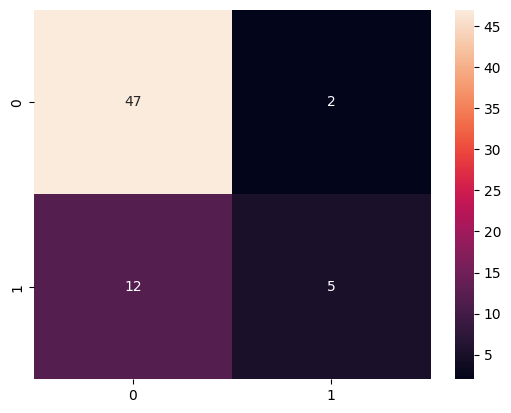

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

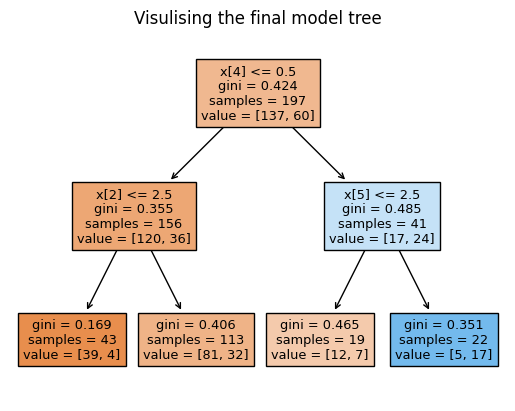

In [50]:
from sklearn.tree import plot_tree
plot_tree(final_model,filled=True)
plt.title("Visulising the final model tree")
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred=lr.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)*100

77.27272727272727

In [57]:
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,False,1
1,3,0,2,0,0,1,1,0,False,0
2,3,0,6,0,0,2,0,1,False,1
3,2,2,6,0,1,3,1,1,True,0
4,2,2,5,4,1,2,0,4,False,1
...,...,...,...,...,...,...,...,...,...,...
267,3,0,5,5,1,2,0,1,False,0
268,3,2,4,4,1,2,0,1,True,0
269,1,2,5,5,1,2,1,4,False,0
270,3,2,2,0,0,2,1,1,False,0


In [62]:
new=[[3,2,6,4,1,3,1,1,False]]

In [64]:
prediction=final_model.predict(new)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])